In [59]:
import pandas as pd
import numpy as np
import spacy
import nltk
import seaborn
import matplotlib.pyplot as plt
import unidecode
from sklearn.metrics import jaccard_score, log_loss
import re
import pattern

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Leeman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 100

In [10]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train = train.dropna()
test = test.fillna(" ")

In [13]:
contractions_dict = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [ ]:
#unidecode.unidecode('\'')
from pattern.en import spelling

word = "amazzziiing"
word_wlf = reduce_lengthening(word) #calling function defined above
print(word_wlf) #word lengthening isn't being able to fix it completely

correct_word = spelling(word_wlf) 
print(correct_word)

In [66]:
stop_words = set(nltk.corpus.stopwords.words('english'))

def clean(text):
    #remove html/things in boxes
    text = re.sub("\[math\].*\[\/math\]" , ' ', text)
    text = unidecode.unidecode(text)
    text = str.lower(text)
    text = re.sub("-", " ", text)
    text = re.sub("\(.*\)", " ", text)
    text = expand_contractions(text)
    text = re.sub("[\?\#\'\",.!:]+", "", text)
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [w for w in tokens if not w in stop_words] 
  
    return tokens


    

train['question1_cleaned'] = train['question1'].apply(clean)
train['question2_cleaned'] = train['question2'].apply(clean)
test['question1_cleaned'] = test['question1'].apply(clean)
test['question2_cleaned'] = test['question2'].apply(clean)

In [65]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned,jaccard
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0.916667
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[story, kohinoor, diamond]","[would, happen, indian, government, stole, kohinoor, diamond, back]",0.285714
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,"[increase, speed, internet, connection, using, vpn]","[internet, speed, increased, hacking, dns]",0.200000
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,"[mentally, lonely, solve]","[find, remainder, divided, 2423]",0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[one, dissolve, water, quikly, sugar, salt, methane, carbon, di, oxide]","[fish, would, survive, salt, water]",0.250000


In [71]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned,jaccard
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0.916667
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[story, kohinoor, diamond]","[would, happen, indian, government, stole, kohinoor, diamond, back]",0.285714
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,"[increase, speed, internet, connection, using, vpn]","[internet, speed, increased, hacking, dns]",0.200000
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,"[mentally, lonely, solve]","[find, remainder, divided, 2423]",0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[one, dissolve, water, quikly, sugar, salt, methane, carbon, di, oxide]","[fish, would, survive, salt, water]",0.250000


In [72]:
def jaccard(row):
    s1 = set(row['question1_cleaned'])
    s2 = set(row['question2_cleaned'])
    u = set(s1 | s2)
    i = set(s1 & s2)
    if len(u) > 0:
        return len(i)/len(u)
    return 0
train['jaccard'] = train.apply(jaccard,axis=1)
test['jaccard'] = test.apply(jaccard,axis=1)

In [ ]:
np.array(train['is_duplicate'])

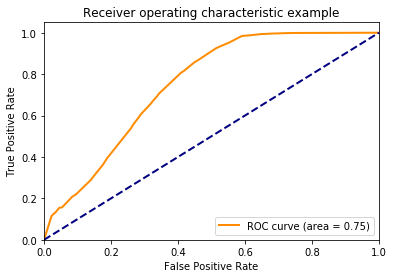

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
y = np.array(train['is_duplicate'])
scores = np.array(train['jaccard'])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
roc_auc = roc_auc_score(y, scores)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y.shape

In [ ]:
x.shape

In [74]:
from sklearn.linear_model import LogisticRegression
y = np.array(train['is_duplicate'])
x = np.array(train['jaccard']).reshape(-1,1)
my_model = LogisticRegression(random_state=0,fit_intercept=True).fit(x, y)
y_pred = my_model.predict_proba(x)[:,1]

In [77]:
log_loss(y,y_pred)

0.5768661603196288

In [75]:
x_test = np.array(test['jaccard']).reshape(-1,1)
test['is_duplicate'] = my_model.predict_proba(x_test)[:,1]

In [80]:
test.head(200)

,test_id,question1,question2,question1_cleaned,question2_cleaned,jaccard,is_duplicate
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?,"[surface, pro, 4, compare, ipad, pro]","[microsoft, choose, core, m3, core, i3, home, surface, pro, 4]",0.272727,0.273146
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?,"[hair, transplant, age, 24, much, would, cost]","[much, cost, hair, transplant, require]",0.500000,0.445043
2,2,What but is the best way to send money from China to the US?,What you send money to China?,"[best, way, send, money, china, us]","[send, money, china]",0.500000,0.445043
3,3,Which food not emulsifiers?,What foods fibre?,"[food, emulsifiers]","[foods, fibre]",0.000000,0.131436
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,"[aberystwyth, start, reading]","[start, reading]",0.666667,0.583011
...,...,...,...,...,...,...,...
195,195,How effective is there a need for a governor in Indian states? Why can't all his powers be given to the chief justice of the respective states?,Why is there a governor and chief minister to state in india?,"[effective, need, governor, indian, states, powers, given, chief, justice, respective, states]","[governor, chief, minister, state, india]",0.153846,0.201779
196,196,"When someone uses the ""devil horns"" hate gesture, what does it say about them?",How do improve add swinging hand gesture to my Android game?,"[someone, uses, devil, horns, hate, gesture, say]","[improve, add, swinging, hand, gesture, android, game]",0.076923,0.163589
197,197,What are the wife vegetables for weight loss?,What are the best best vegetables for weight loss?,"[wife, vegetables, weight, loss]","[best, best, vegetables, weight, loss]",0.600000,0.528171
198,198,Why do I stammer? Is there any cure?,Is there any cure of stammering?,"[stammer, cure]","[cure, stammering]",0.333333,0.315056


In [78]:
submission = test[['test_id','is_duplicate']]

In [79]:
submission.head()
submission.to_csv('my_submission.csv',index=False)